In [1]:
import tkinter
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
#import tensorflow as tf
#from tensorflow.keras import layers
#from tensorflow.keras import metrics
from sklearn import datasets
import pandas as pd
import numpy as np
import pandas_profiling as pp
import re

## Load and Clean Data

In [2]:
# Read in CSV
df = pd.read_csv("final_project.csv")
print(len(df))

160000


In [3]:
# Rename obvious columns
df.rename(columns={'x24': 'continent', 'x29': 'month', 'x30': 'day'}, inplace = True)
#list(df.columns) 

In [4]:
# Correct misspellings and standardize values in labeled columns
df['continent'].replace('euorpe', 'europe',inplace=True)
df['month'].replace('Dev', '12',inplace=True)
df['month'].replace('Aug', '8',inplace=True)
df['month'].replace('Jun', '6',inplace=True)
df['month'].replace('Apr', '4',inplace=True)
df['month'].replace('Nov', '11',inplace=True)
df['month'].replace('sept.', '9',inplace=True)
df['month'].replace('Oct', '10',inplace=True)
df['month'].replace('Mar', '3',inplace=True)
df['month'].replace('January', '1',inplace=True)
df['month'].replace('Feb', '2',inplace=True)
df['month'].replace('May', '5',inplace=True)
df['month'].replace('July', '7',inplace=True)
df['month'].replace('December', '12',inplace=True)
df['month'].replace('August', '8',inplace=True)
df['month'].replace('June', '6',inplace=True)
df['month'].replace('April', '4',inplace=True)
df['month'].replace('November', '11',inplace=True)
df['month'].replace('September', '9',inplace=True)
df['month'].replace('October', '10',inplace=True)
df['month'].replace('March', '3',inplace=True)
df['day'].replace('thurday', 'thursday',inplace=True)


# Fill NA with 'other' in labeled columns
df['continent'] = df['continent'].fillna('other')
df['month'] = df['month'].fillna('other')
df['day'] = df['day'].fillna('other')
df['month'].replace('other','0', inplace=True)

# check unique values in labeled columns
print (df['continent'].unique())
print (df['month'].unique())
print (df['day'].unique())

['europe' 'asia' 'america' 'other']
['7' '8' '6' '5' '9' '4' '11' '10' '0' '3' '2' '12' '1']
['tuesday' 'wednesday' 'thursday' 'monday' 'friday' 'other']


In [5]:
# initialize temp for x37 column
temp_x37 = []

# Remove $ ) , characters and replace '(' with '-' 
for i in range (0,len(df)) :
    try :
        n = df['x37'][i]
        nstr = re.sub(r'[$|,|)]',r'', n)
        nstr = re.sub(r'[(]',r'-',nstr)
        #nstr= float(nstr)
        temp_x37.append(nstr)
    except :
        nstr = ''
        temp_x37.append(nstr)

In [6]:
# Verify len of both x37 matches
print(len(df['x37']))
print(len(temp_x37))

# Replace 'x37' with new values and convert to numeric
df['x37'] = temp_x37
df["x37"] = pd.to_numeric(df["x37"])
df['x37']

160000
160000


0         1313.96
1         1962.78
2          430.47
3        -2366.29
4         -620.66
           ...   
159995    -891.96
159996    1588.65
159997     687.46
159998     439.21
159999   -1229.34
Name: x37, Length: 160000, dtype: float64

In [7]:
# Subsetting data set by continent and print length of each
cont = ['asia', 'america','europe', 'other']

for n in cont :
    temp = df['continent'] == n
    df_temp = df[temp]
    #df_[n] = df_temp
    print (n, 'length is', len(df_temp))

# Subsetting by continent    
is_asia = df['continent']=='asia'
df_asia = df[is_asia]

is_europe = df['continent']=='europe'
df_europe = df[is_europe]

is_america = df['continent']=='america'
df_america = df[is_america]

is_other = df['continent']=='other'
df_other = df[is_other]

asia length is 138965
america length is 4469
europe length is 16538
other length is 28


## Explore Data

In [8]:
#Create new column for sum of all rows
df['Total']=df[['x0','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x21','x22','x23','x25','x26','x27','x28','x31','x33','x34','x35','x36','x38','x39','x40','x41','x42','x43','x44','x45','x46','x47','x48','x49']].sum(axis=1)

In [9]:
df.head(3)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x42,x43,x44,x45,x46,x47,x48,x49,y,Total
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0,39.629492
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0,149.249956
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0,56.054797


## Trial 2

In [10]:
#Create new dataframe with categorical variables, percent, Money Amount, y, and new total column
newdf=df[['continent', 'month', 'day', 'x32', 'x37', 'y', 'Total']]
newdf.x32=newdf.x32.str.rstrip('%').astype('float')
newdf.month=newdf.month.astype('str').astype('int')

C:\Users\jodip\Anaconda3\envs\QTWFinal\lib\site-packages\pandas\core\generic.py:5209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [11]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 7 columns):
continent    160000 non-null object
month        160000 non-null int32
day          160000 non-null object
x32          159969 non-null float64
x37          159977 non-null float64
y            160000 non-null int64
Total        160000 non-null float64
dtypes: float64(3), int32(1), int64(1), object(2)
memory usage: 7.9+ MB


In [12]:
#correlation with this new dataset
newdf.corr(method='pearson')

,month,x32,x37,y,Total
month,1.000000,-0.002892,0.001102,-0.000853,0.003646
x32,-0.002892,1.000000,-0.325329,-0.005803,-0.330493
x37,0.001102,-0.325329,1.000000,0.055002,0.612699
y,-0.000853,-0.005803,0.055002,1.000000,0.054696
Total,0.003646,-0.330493,0.612699,0.054696,1.000000


In [13]:
#new dataset that adds 2 columns: New total column that also adds x37, and a column that divides the Total column by x37
calcdf=newdf.assign(FullTotal=lambda x: newdf['x37']+newdf['Total'],
             TotalDiv37=lambda x: newdf['Total']/newdf['x37'])
calcdf.head(3)

,continent,month,day,x32,x37,y,Total,FullTotal,TotalDiv37
0,europe,7,tuesday,0.00,1313.96,0,39.629492,1353.589492,0.030160
1,asia,8,wednesday,-0.02,1962.78,0,149.249956,2112.029956,0.076040
2,asia,7,wednesday,-0.01,430.47,0,56.054797,486.524797,0.130218


In [14]:
#new dataset that adds 2 more columns: Full total x the percentage number, and total (without x37) x the percentage number
calcdf=calcdf.assign(FullTotalXPerc=lambda x: calcdf['FullTotal']*calcdf['x32'],
                     TotalXPerc=lambda x: calcdf['Total']*calcdf['x32'])

calcdf.head(3)

,continent,month,day,x32,x37,y,Total,FullTotal,TotalDiv37,FullTotalXPerc,TotalXPerc
0,europe,7,tuesday,0.00,1313.96,0,39.629492,1353.589492,0.030160,0.000000,0.000000
1,asia,8,wednesday,-0.02,1962.78,0,149.249956,2112.029956,0.076040,-42.240599,-2.984999
2,asia,7,wednesday,-0.01,430.47,0,56.054797,486.524797,0.130218,-4.865248,-0.560548


In [15]:
calcdf.corr(method='pearson')

,month,x32,x37,y,Total,FullTotal,TotalDiv37,FullTotalXPerc,TotalXPerc
month,1.000000,-0.002892,0.001102,-0.000853,0.003646,0.001312,-0.003437,0.002527,0.003083
x32,-0.002892,1.000000,-0.325329,-0.005803,-0.330493,-0.334341,-0.000660,0.081212,-0.107369
x37,0.001102,-0.325329,1.000000,0.055002,0.612699,0.998342,-0.001158,-0.079124,0.063205
y,-0.000853,-0.005803,0.055002,1.000000,0.054696,0.056439,-0.003723,-0.039051,0.135095
Total,0.003646,-0.330493,0.612699,0.054696,1.000000,0.657168,-0.001270,0.011983,0.127339
FullTotal,0.001312,-0.334341,0.998342,0.056439,0.657168,1.000000,-0.001197,-0.074590,0.069549
TotalDiv37,-0.003437,-0.000660,-0.001158,-0.003723,-0.001270,-0.001197,1.000000,0.000250,-0.001613
FullTotalXPerc,0.002527,0.081212,-0.079124,-0.039051,0.011983,-0.074590,0.000250,1.000000,0.673619
TotalXPerc,0.003083,-0.107369,0.063205,0.135095,0.127339,0.069549,-0.001613,0.673619,1.000000


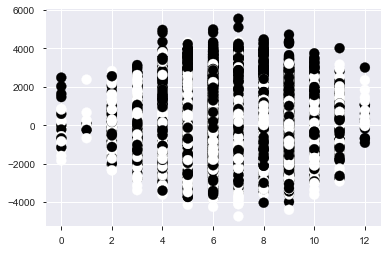

In [16]:
%matplotlib inline
plt.scatter(calcdf.month, calcdf.x37,s=100, c=calcdf.y)

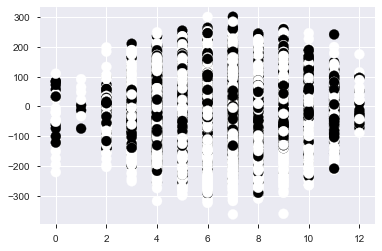

In [17]:
plt.scatter(calcdf.month, calcdf.Total,s=100, c=calcdf.y)

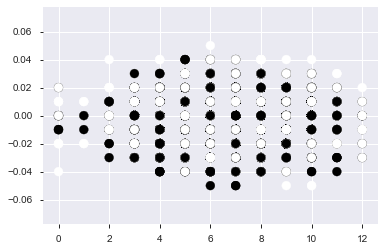

In [18]:
plt.scatter(calcdf.month, calcdf.x32,s=80, c=calcdf.y)

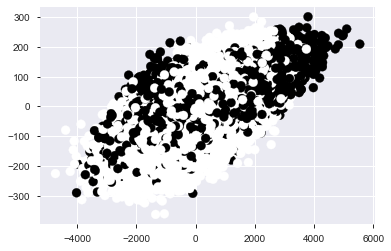

In [26]:
plt.scatter(calcdf.x37, calcdf.Total,s=80, c=calcdf.y)

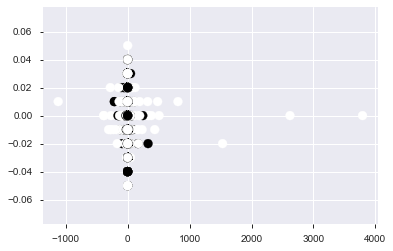

In [20]:
plt.scatter(calcdf.TotalDiv37, calcdf.x32,s=80, c=calcdf.y)

<Figure size 800x640 with 0 Axes>

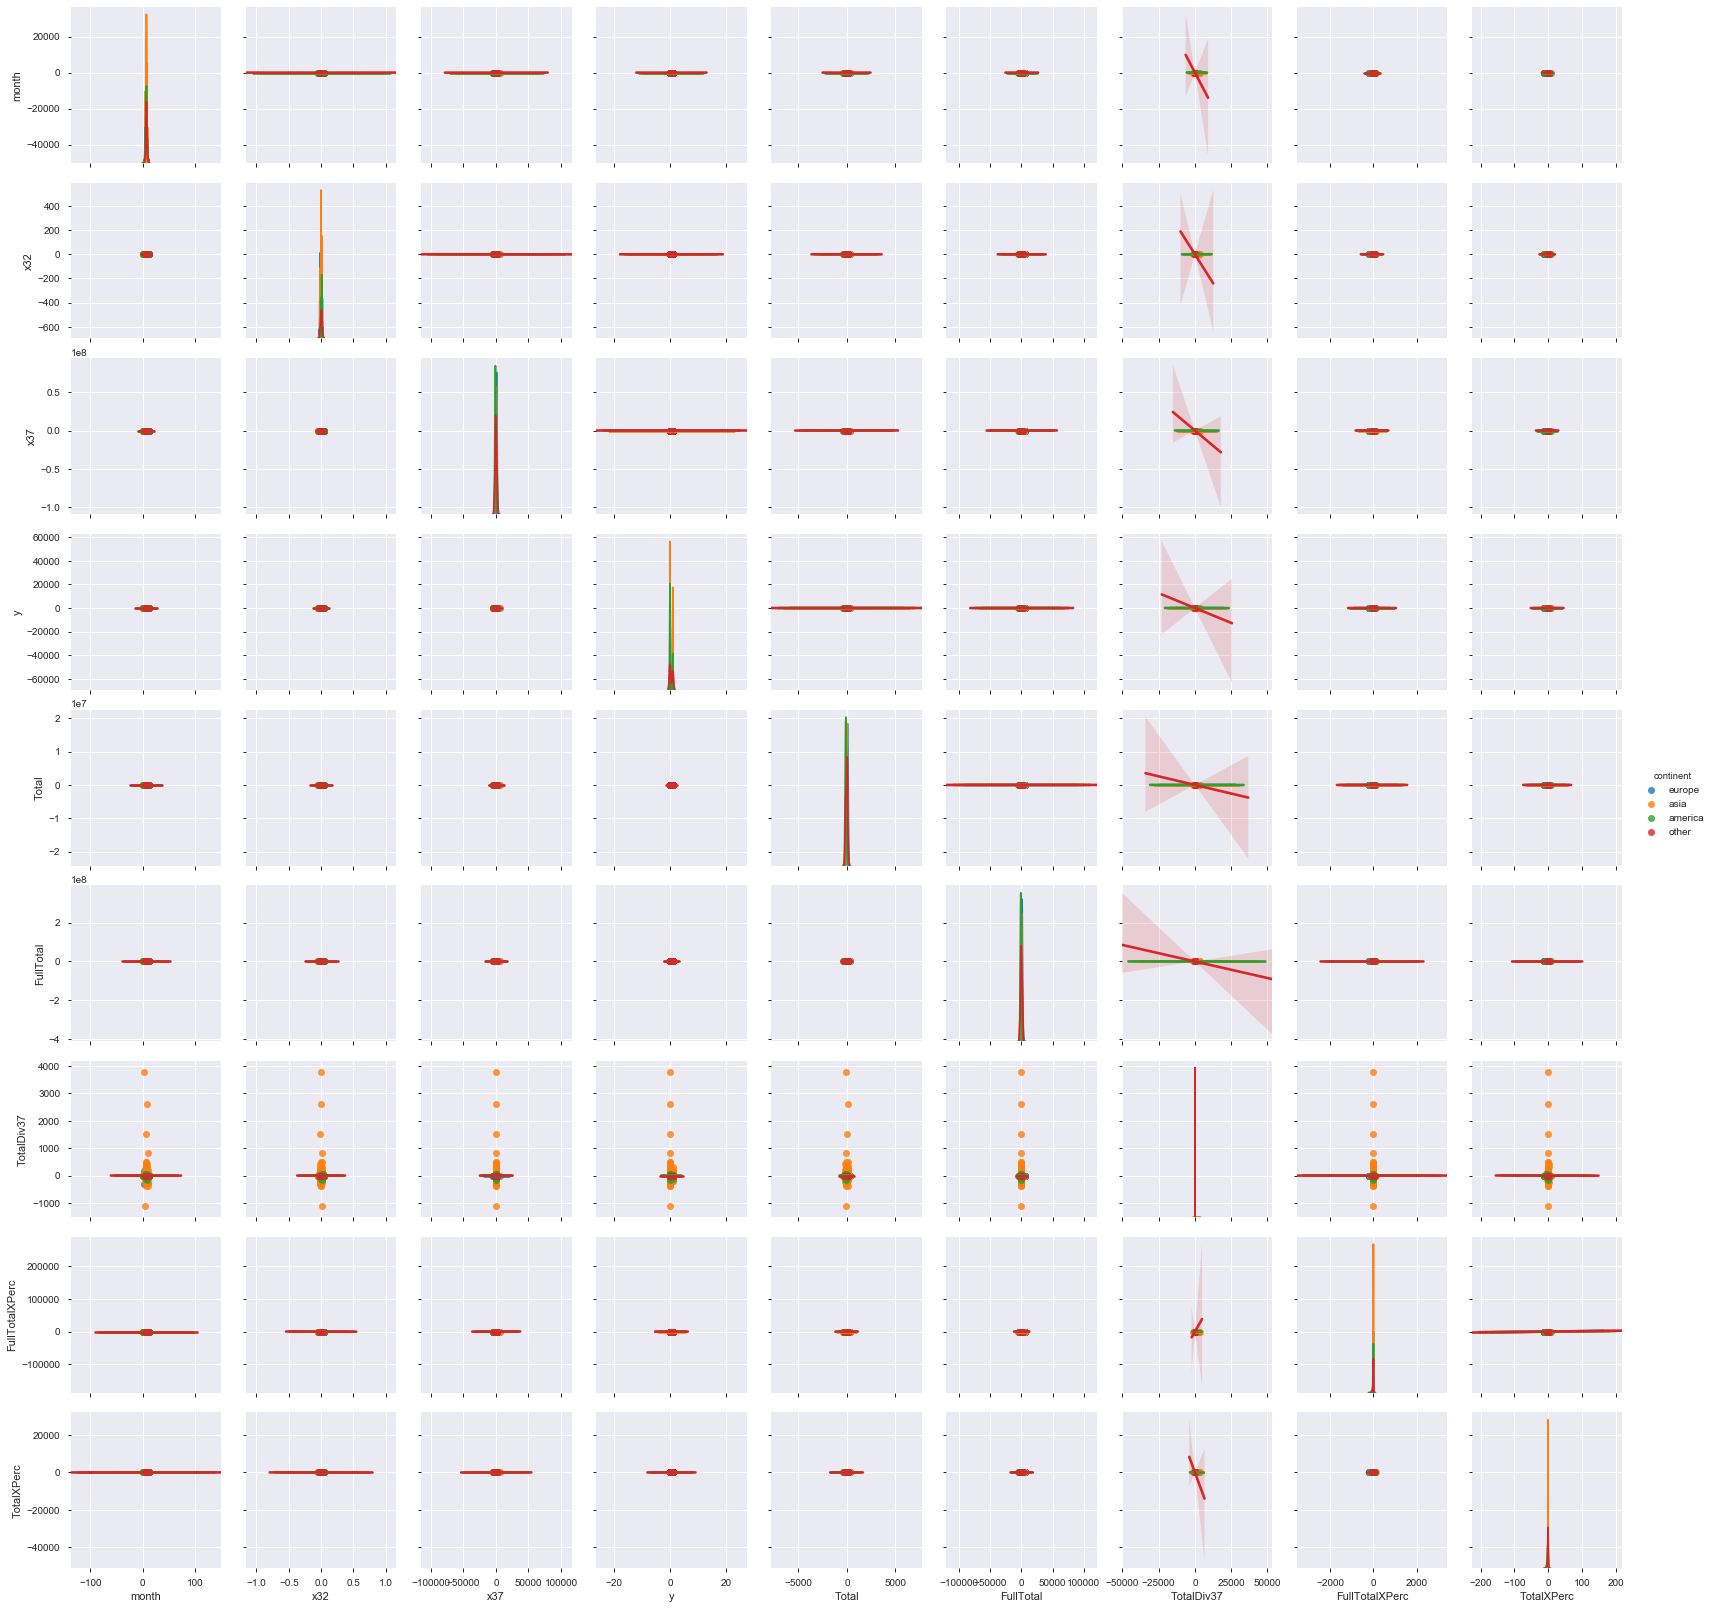

In [34]:
#drop NAs and see scatters by continent 
import seaborn as sns
calcdf_noNA=calcdf.dropna()
plt.figure(figsize=(10,8), dpi=80)
sns.pairplot(calcdf_noNA, kind="reg", hue="continent")
plt.show()

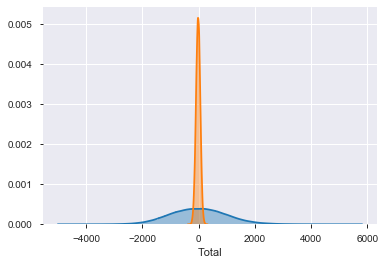

In [37]:
sns.distplot(calcdf_noNA['x37'])
sns.distplot(calcdf_noNA['Total'])

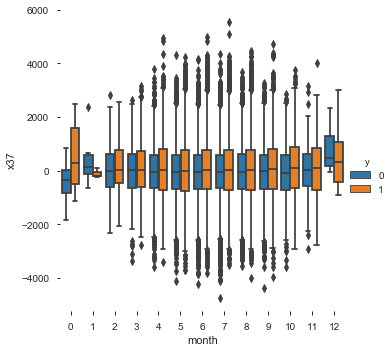

In [43]:
with sns.axes_style(style='ticks'):
    g=sns.catplot("month", "x37", "y", data=calcdf_noNA, kind="box");

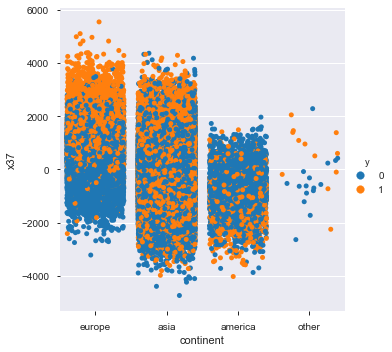

In [49]:
g=sns.catplot(x='continent', y='x37', hue='y', data=calcdf_noNA, jitter='0.40')


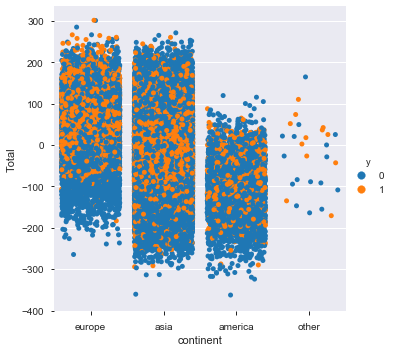

In [48]:
g=sns.catplot(x='continent', y='Total', hue='y', data=calcdf_noNA, jitter='0.40')


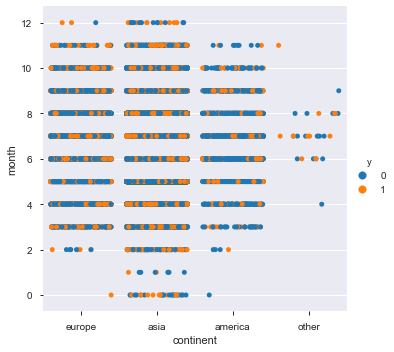

In [55]:
g=sns.catplot(x='continent', y='month', hue='y', data=calcdf_noNA, jitter='0.40')


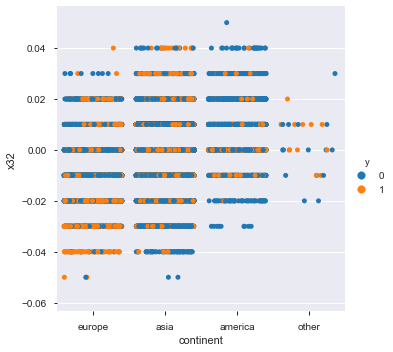

In [54]:
g=sns.catplot(x='continent', y='x32', hue='y', data=calcdf_noNA, jitter='0.40')
